# Ejercicios

## Cargar librerías

In [94]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords


## Carga nltk


In [95]:
# Descargar stopwords si no están disponibles
#nltk.download("stopwords")

# Asegurar que nltk busca en la carpeta correcta
nltk.data.path.append("nltk_data")

# Definir el idioma de stopwords (español)
stop_words = set(stopwords.words("spanish"))

## Cargar datos en dataframe

In [96]:
# Definir la ruta del archivo
ruta_archivo = "corpus/development.csv"

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(ruta_archivo, encoding="latin1")

# Mostrar las primeras filas del DataFrame
# print(df.head())

# Contar incidencias en la columna de interés (ejemplo: 'categoria')
conteo = df["Category"].value_counts()

# Mostrar el conteo
print(conteo)

Category
True    153
Fake    142
Name: count, dtype: int64


## Analisis de datos

In [97]:
# Filtrar solo las filas donde 'Category' es True
df_filtrado = df[df["Category"] == 'True']  

# Seleccionar aleatoriamente 10 registros
df_muestra = df_filtrado.sample(n=10, random_state=42)  # Cambia el seed se requieren diferentes resultados


# Concatenar todo el texto en una sola cadena
texto_completo = " ".join(df_muestra["Text"].dropna())

# Normalizar texto
texto_completo = texto_completo.lower()
texto_completo = re.sub(r"[^\w\s]", "", texto_completo)  # Eliminar puntuación

# Dividir en palabras y eliminar stopwords
palabras = [word for word in texto_completo.split() if word not in stop_words]

# Contar frecuencia de palabras
contador_palabras = Counter(palabras)

print(contador_palabras)

# Obtener las 10 palabras más frecuentes
num_palabras = 15
top_palabras = contador_palabras.most_common(num_palabras)

Counter({'number': 76, 'ms': 35, 'pas': 22, 'millones': 16, 'aos': 15, 'partido': 15, 'dos': 15, 'mxico': 15, 'tambin': 14, 'spotify': 14, 'saudita': 13, 'poltica': 12, 'nios': 12, 'hospital': 12, 'irn': 11, 'pasado': 10, 'sido': 10, 'arabia': 10, 'abderrahim': 9, 'ennahda': 9, 'dijo': 9, 'usuarios': 9, 'ususdnumber': 9, 'est': 8, 'tras': 8, 'gran': 8, 'gobierno': 8, 'defensa': 8, 'datos': 8, 'infantil': 8, 'tnez': 7, 'nacional': 7, 'fuerzas': 7, 'ser': 7, 'presidente': 7, 'estn': 7, 'rivera': 7, 'papa': 7, 'ciento': 7, 'cuenta': 6, 'gnero': 6, 'municipales': 6, 'hacer': 6, 'campaa': 6, 'cada': 6, 'recibi': 6, 'familias': 6, 'pea': 6, 'venezuela': 6, 'menos': 6, 'informacin': 6, 'campana': 6, 'amor': 6, 'petrleo': 6, 'precio': 6, 'ao': 6, 'negocio': 6, 'ilegales': 6, 'primera': 5, 'alcaldesa': 5, 'ley': 5, 'elecciones': 5, 'frente': 5, 'ltimos': 5, 'electoral': 5, 'hoy': 5, 'ningn': 5, 'pues': 5, 'canad': 5, 'destac': 5, 'fuerza': 5, 'armadas': 5, 'favor': 5, 'as': 5, 'pintas': 5, 'cue

## Graficar top 10 repeticiones

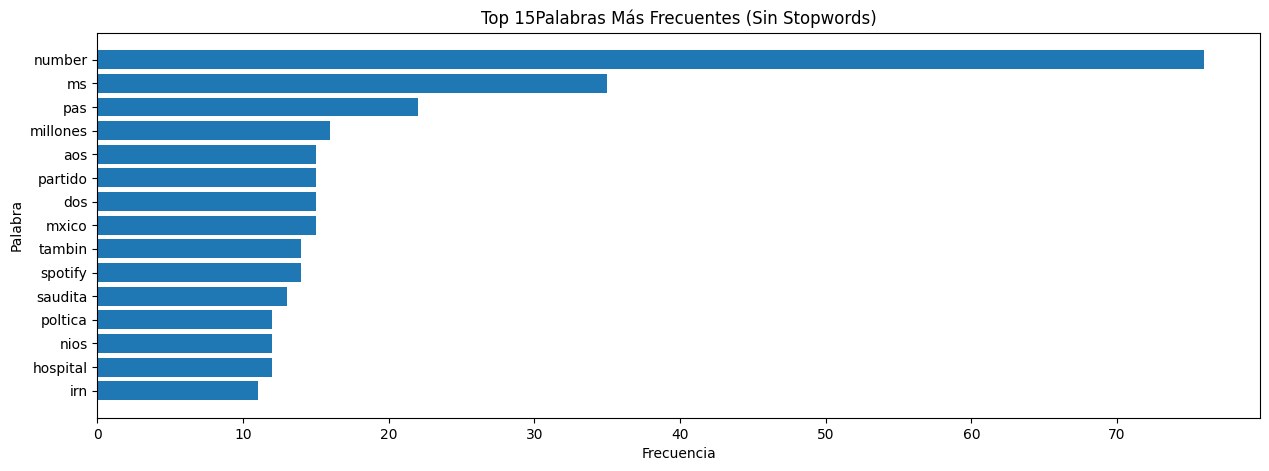

In [98]:
# Extraer datos para graficar
palabras, frecuencias = zip(*top_palabras)

# Crear gráfico de barras
plt.figure(figsize=(num_palabras, 5))
plt.barh(palabras[::-1], frecuencias[::-1])  # Invertimos para mostrar la más frecuente arriba
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.title("Top "+str(num_palabras)+"Palabras Más Frecuentes (Sin Stopwords)")
plt.show()